Average concentration drop per metal type:
   Metal  Average_Drop
0      A      0.000615
1      B      0.000650
2      C      0.000569
3      D      0.000691
4      E      0.000548
5      F      0.000625
6      G      0.000607
7      H      0.000698
8      J      0.000725
9      K      0.000745
10     M      0.000531
11     N      0.000626


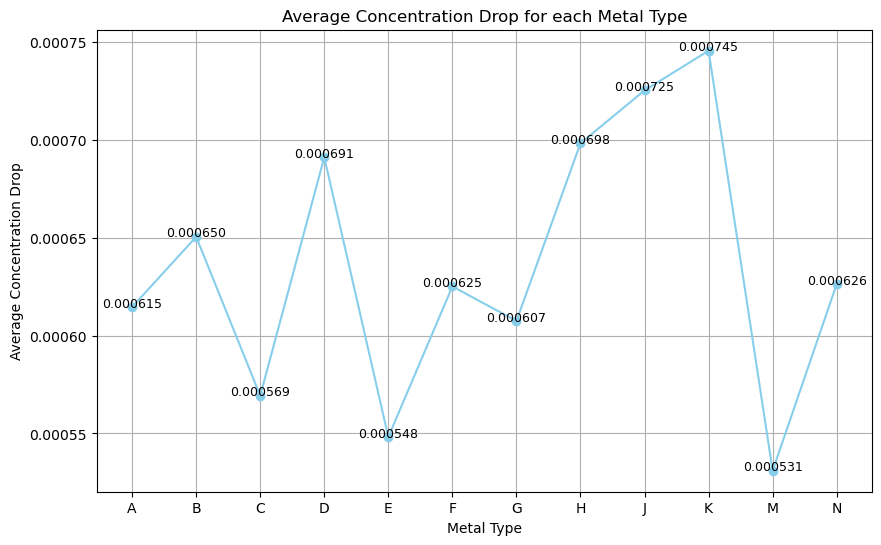

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe for the primary data
df = pd.DataFrame({
    'Set': [1, 2, 3, 4],
    'Initial_Concentration': [3.3, 3.21, 3.1, 2.9],
    'Final_Concentration': [3.21, 3.1, 2.9, 2.8],
    'Metals': [
        {'A': 16, 'B': 35, 'C': 22, 'D': 4, 'E': 5, 'F': 16, 'G': 2, 'H': 13, 'J': 12, 'K': 13, 'M': 20, 'N': 32},
        {'A': 19, 'B': 13, 'C': 11, 'D': 5, 'E': 3, 'F': 18, 'G': 3, 'H': 23, 'J': 25, 'K': 15, 'M': 17, 'N': 26},
        {'A': 8, 'B': 31, 'C': 10, 'D': 9, 'E': 1, 'F': 10, 'G': 2, 'H': 23, 'J': 30, 'K': 44, 'N': 25},
        {'A': 9, 'B': 32, 'C': 36, 'D': 9, 'E': 5, 'F': 11, 'G': 5, 'H': 14, 'J': 15, 'K': 28, 'M': 7, 'N': 36}
    ]
})

# Calculate Total Drop and add to the DataFrame
df['Total_Drop'] = df['Initial_Concentration'] - df['Final_Concentration']

# Initialize dictionaries for total drop and count of each metal type
metal_totals = {}
metal_counts = {}

# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    metals = row['Metals']
    total_drop = row['Total_Drop']
    num_metals = sum(metals.values())
    
    # Calculate the proportional drop for each metal
    for metal, count in metals.items():
        proportional_drop = total_drop * (count / num_metals)
        if metal in metal_totals:
            metal_totals[metal] += proportional_drop
            metal_counts[metal] += count
        else:
            metal_totals[metal] = proportional_drop
            metal_counts[metal] = count

# Calculate the average drop per metal type
average_drops = {metal: metal_totals[metal] / metal_counts[metal] for metal in metal_totals}

# Convert the results to a pandas DataFrame for easier manipulation
average_drops_df = pd.DataFrame(list(average_drops.items()), columns=['Metal', 'Average_Drop'])

# Display the average drops
print("Average concentration drop per metal type:")
print(average_drops_df)

# Plot the average drops
plt.figure(figsize=(10, 6))
plt.plot(average_drops_df['Metal'], average_drops_df['Average_Drop'], marker='o', linestyle='-', color='skyblue')
plt.title('Average Concentration Drop for each Metal Type')
plt.xlabel('Metal Type')
plt.ylabel('Average Concentration Drop')

# Annotate the points on the plot with the values
for idx, row in average_drops_df.iterrows():
    plt.text(row['Metal'], row['Average_Drop'], f'{row["Average_Drop"]:.6f}', fontsize=9, ha='center')

plt.grid(True)
plt.show()
